# EDA

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.seasonal import STL
import sys
import os
import pandas as pd
sys.path.append('../scripts')
import warnings
warnings.filterwarnings('ignore')
from data_loader import *

In [2]:
# path to the CSV file
filename1 = 'train_final.parquet'

path1 = os.path.join('..', 'data/model_input', filename1)

# Load dataset
train_df = load_data(path1)

In [3]:
# Set general aesthetics for the plots
sn.set_style("whitegrid")

In [4]:
women_clothing_df = train_df[train_df['ProductCategory']=='WomenClothing']
men_clothing_df = train_df[train_df['ProductCategory']=='MenClothing']
other_clothing_df = train_df[train_df['ProductCategory']=='OtherClothing']

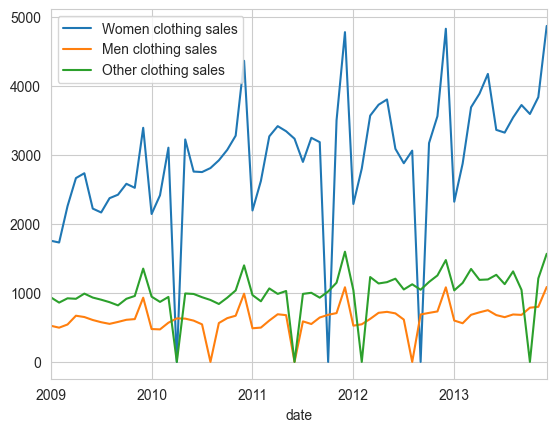

In [5]:
ax = women_clothing_df.plot(y='Sales(In ThousandDollars)', label='Women clothing sales')
men_clothing_df.plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_df.plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()

In [6]:
women_sales_outliers = women_clothing_df.index[women_clothing_df['Sales(In ThousandDollars)'] == 0].tolist()
women_clothing_df.loc[women_clothing_df.index.isin(women_sales_outliers), 'Sales(In ThousandDollars)'] = np.nan
women_clothing_df['Sales(In ThousandDollars)']= np.where((women_clothing_df['Sales(In ThousandDollars)'].isnull()) & (women_clothing_df.index.isin(women_sales_outliers)), women_clothing_df['Sales(In ThousandDollars)'].interpolate(),women_clothing_df['Sales(In ThousandDollars)'])

men_sales_outliers = men_clothing_df.index[men_clothing_df['Sales(In ThousandDollars)'] == 0].tolist()
men_clothing_df.loc[men_clothing_df.index.isin(men_sales_outliers), 'Sales(In ThousandDollars)'] = np.nan
men_clothing_df['Sales(In ThousandDollars)']= np.where((men_clothing_df['Sales(In ThousandDollars)'].isnull()) & (men_clothing_df.index.isin(men_sales_outliers)), men_clothing_df['Sales(In ThousandDollars)'].interpolate(),men_clothing_df['Sales(In ThousandDollars)'])

other_sales_outliers = other_clothing_df.index[other_clothing_df['Sales(In ThousandDollars)'] == 0].tolist()
other_clothing_df.loc[other_clothing_df.index.isin(other_sales_outliers), 'Sales(In ThousandDollars)'] = np.nan
other_clothing_df['Sales(In ThousandDollars)']= np.where((other_clothing_df['Sales(In ThousandDollars)'].isnull()) & (other_clothing_df.index.isin(other_sales_outliers)), other_clothing_df['Sales(In ThousandDollars)'].interpolate(), other_clothing_df['Sales(In ThousandDollars)'])

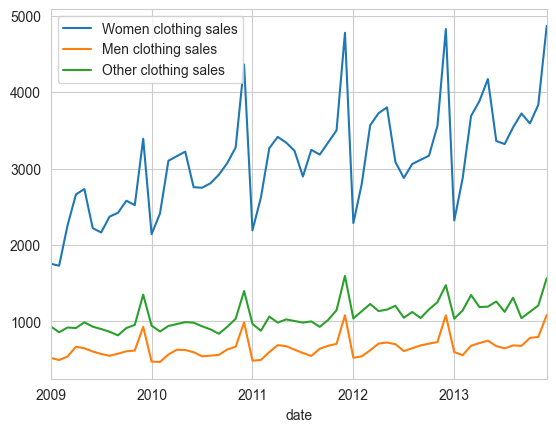

In [7]:
ax = women_clothing_df.plot(y='Sales(In ThousandDollars)', label='Women clothing sales')
men_clothing_df.plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_df.plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()

## Correlation Analysis

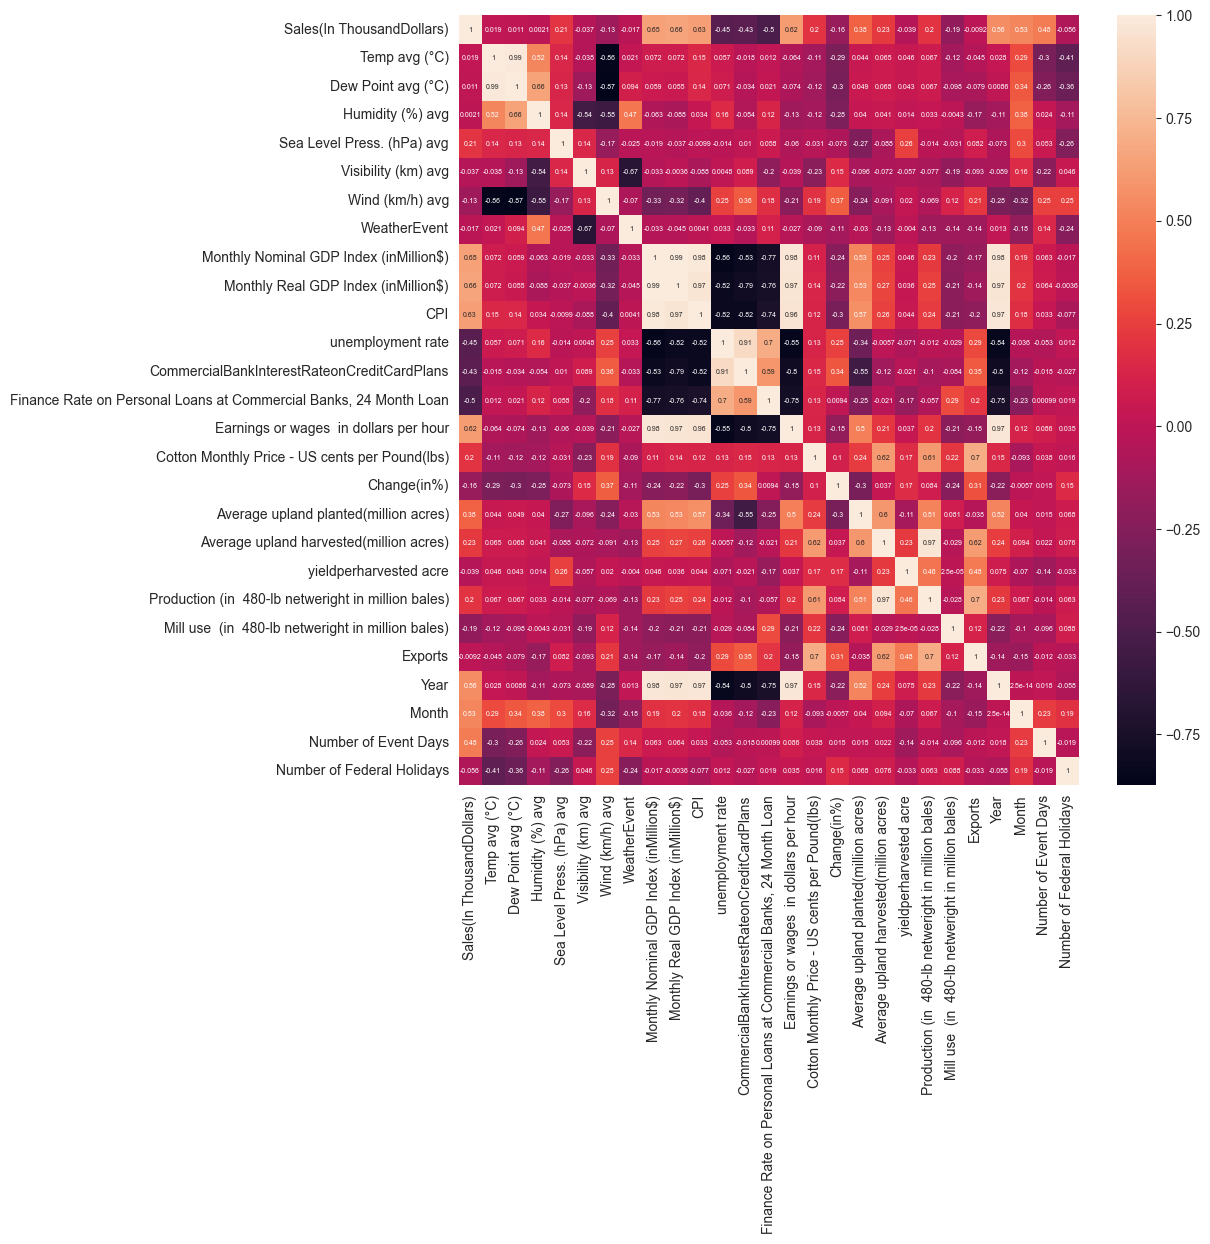

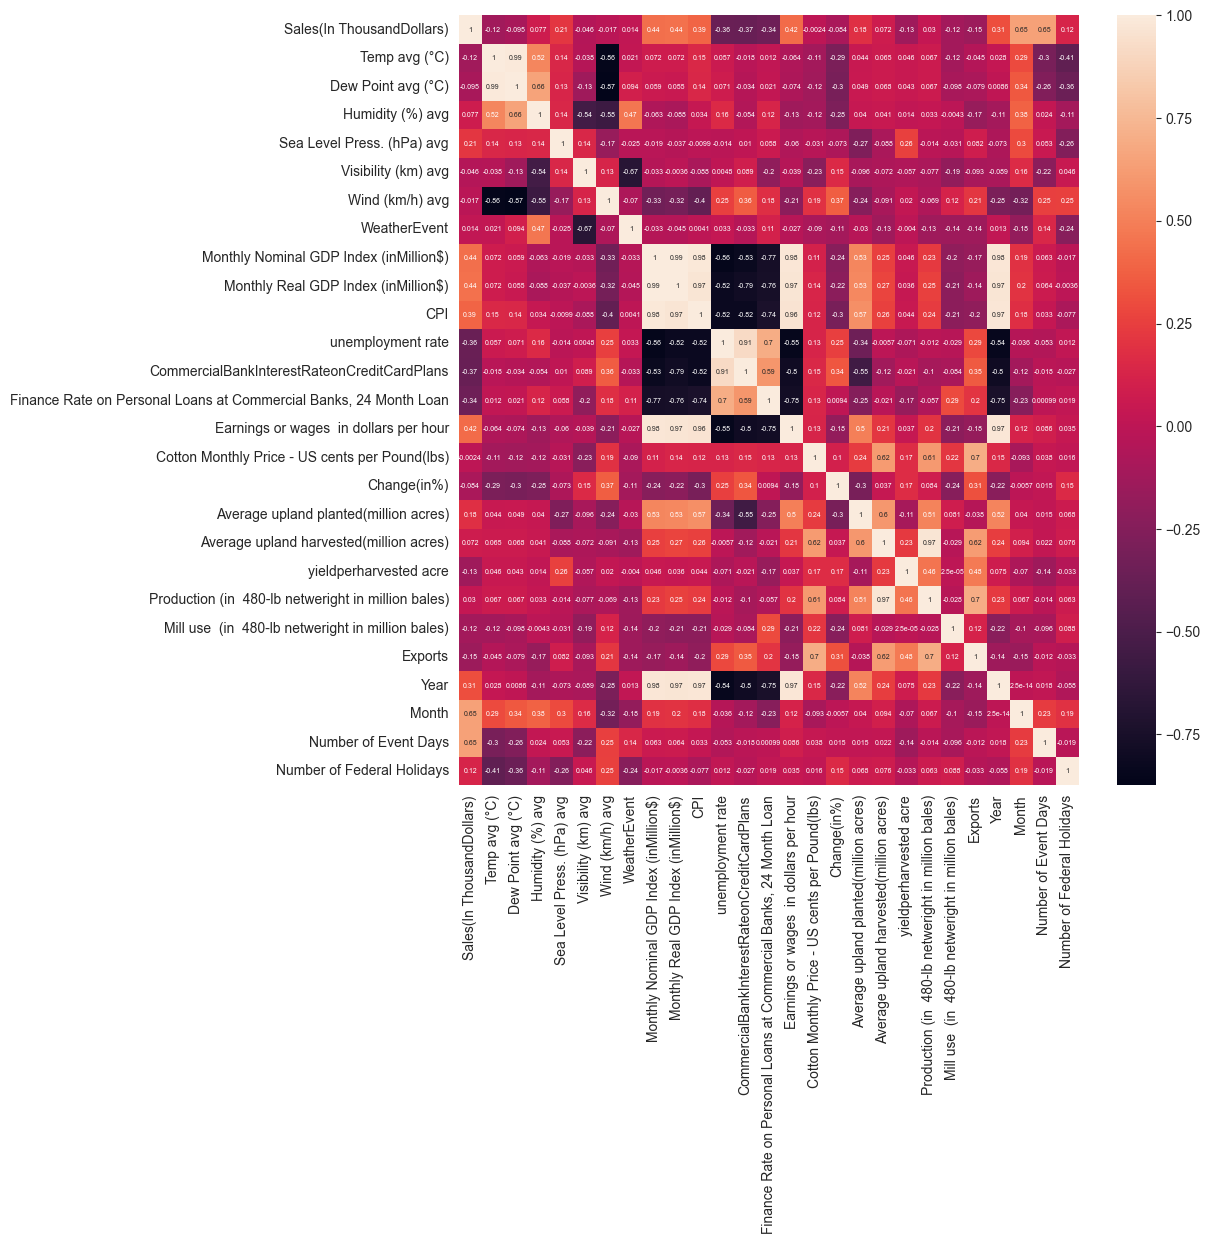

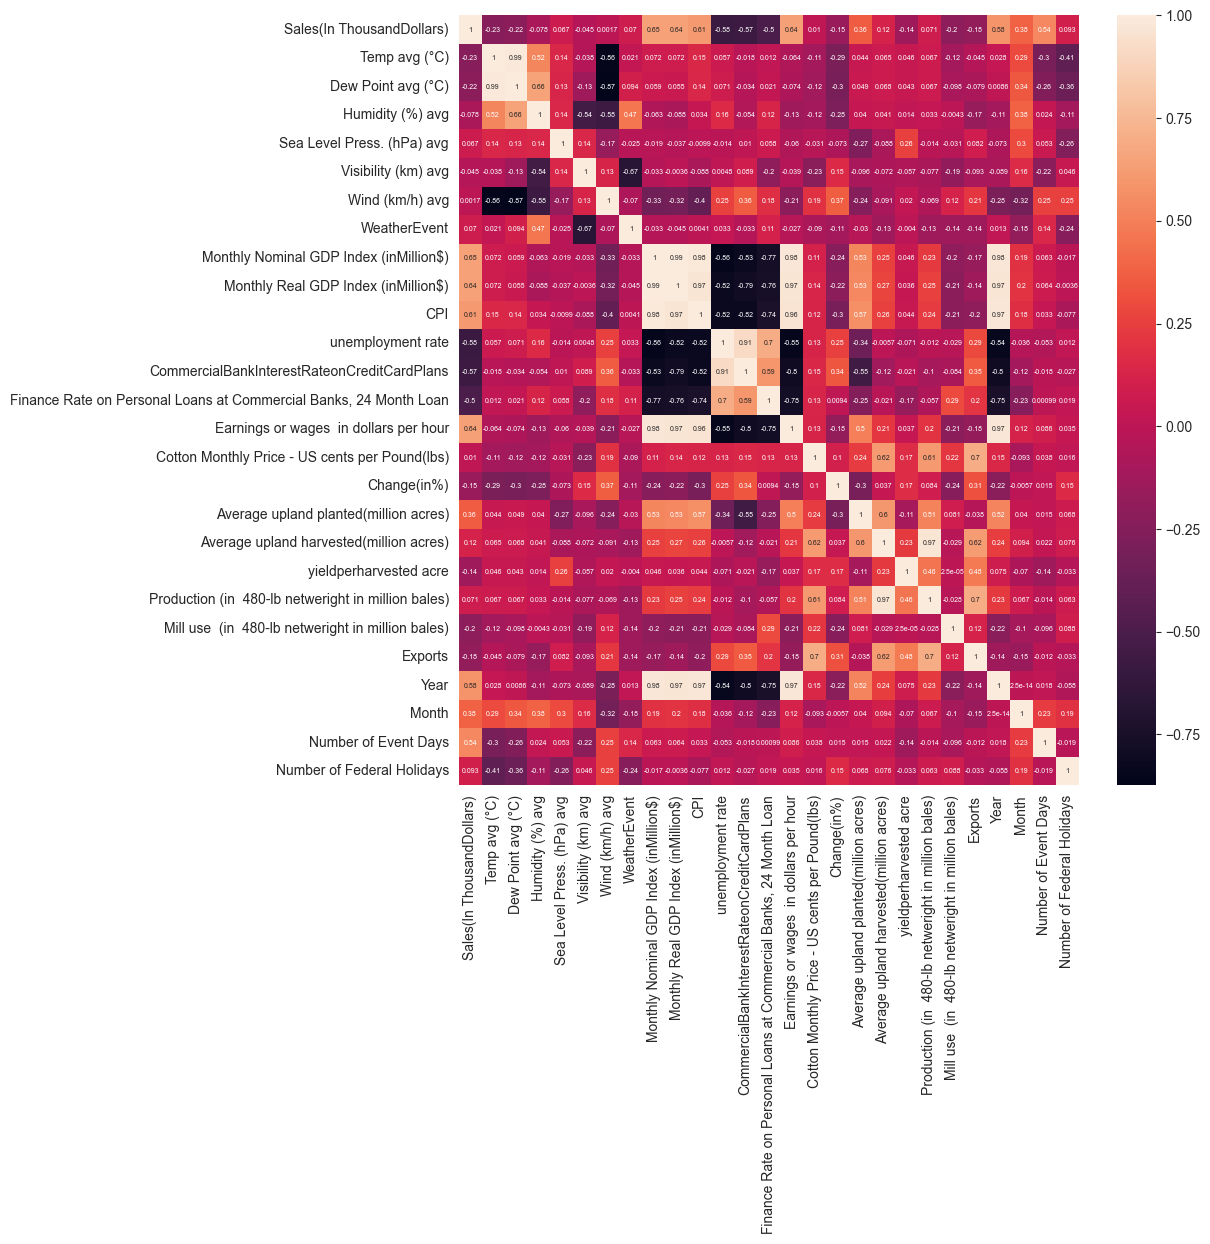

In [8]:
women_clothing_num_cols = women_clothing_df.select_dtypes(include='number').columns
men_clothing_num_cols = men_clothing_df.select_dtypes(include='number').columns
other_clothing_num_cols = other_clothing_df.select_dtypes(include='number').columns

corr_matrices = []
for df, num_cols in zip([women_clothing_df, men_clothing_df, other_clothing_df], 
                       [women_clothing_num_cols, men_clothing_num_cols, other_clothing_num_cols]):
  corr_matrix = df[num_cols].corr()
  fig, ax = plt.subplots(figsize=(10,10))
  sn.heatmap(corr_matrix, annot=True, annot_kws={"size": 5}, ax=ax)
  corr_matrices.append(corr_matrix)

In [9]:
corr_matrices[0]

,Sales(In ThousandDollars),Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),...,Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month,Number of Event Days,Number of Federal Holidays
Sales(In ThousandDollars),1.000000,0.018503,0.010605,0.002080,0.209254,-0.036641,-0.133335,-0.016771,0.645168,0.657165,...,0.382296,0.227494,-0.039483,0.197188,-0.186991,-0.009239,5.602802e-01,5.253589e-01,0.482162,-0.055635
Temp avg (°C),0.018503,1.000000,0.985474,0.524618,0.141299,-0.037769,-0.858041,0.021214,0.071768,0.072431,...,0.044138,0.065085,0.046369,0.066564,-0.117435,-0.045424,2.809273e-02,2.903040e-01,-0.297297,-0.407617
Dew Point avg (°C),0.010605,0.985474,1.000000,0.655866,0.132469,-0.132156,-0.874200,0.093946,0.059295,0.055319,...,0.048907,0.067613,0.042725,0.066808,-0.097554,-0.078569,8.626453e-03,3.418134e-01,-0.264439,-0.357291
Humidity (%) avg,0.002080,0.524618,0.655866,1.000000,0.139480,-0.541986,-0.576945,0.465066,-0.062800,-0.087531,...,0.040356,0.041264,0.013726,0.033193,-0.004344,-0.170138,-1.127844e-01,3.778152e-01,0.023563,-0.110886
Sea Level Press. (hPa) avg,0.209254,0.141299,0.132469,0.139480,1.000000,0.141068,-0.169161,-0.024820,-0.018933,-0.036705,...,-0.266604,-0.087891,0.260503,-0.014336,-0.031255,0.081682,-7.266588e-02,2.956950e-01,0.052793,-0.258344
Visibility (km) avg,-0.036641,-0.037769,-0.132156,-0.541986,0.141068,1.000000,0.128250,-0.673577,-0.032609,-0.003576,...,-0.095633,-0.071696,-0.057140,-0.077172,-0.186680,-0.092638,-8.907926e-02,1.628748e-01,-0.216236,0.046249
Wind (km/h) avg,-0.133335,-0.858041,-0.874200,-0.576945,-0.169161,0.128250,1.000000,-0.070315,-0.333362,-0.316525,...,-0.244365,-0.090897,0.020027,-0.068727,0.121400,0.211938,-2.848151e-01,-3.179475e-01,0.248706,0.254670
WeatherEvent,-0.016771,0.021214,0.093946,0.465066,-0.024820,-0.673577,-0.070315,1.000000,-0.032572,-0.045119,...,-0.030455,-0.133960,-0.003972,-0.127451,-0.137956,-0.137443,1.253071e-02,-1.839503e-01,0.142650,-0.236638
Monthly Nominal GDP Index (inMillion$),0.645168,0.071768,0.059295,-0.062800,-0.018933,-0.032609,-0.333362,-0.032572,1.000000,0.994817,...,0.525076,0.246664,0.046461,0.229896,-0.195745,-0.168890,9.759554e-01,1.913246e-01,0.062813,-0.016763
Monthly Real GDP Index (inMillion$),0.657165,0.072431,0.055319,-0.087531,-0.036705,-0.003576,-0.316525,-0.045119,0.994817,1.000000,...,0.532605,0.274493,0.036087,0.253858,-0.214783,-0.135842,9.652937e-01,2.016768e-01,0.064281,-0.003557


In [10]:
columns = []
for mx in corr_matrices:
  columns.append(mx[(mx['Sales(In ThousandDollars)'] > 0.08) | (mx['Sales(In ThousandDollars)'] < -0.08)].index.values)

In [11]:
women_clothing_df = women_clothing_df[columns[0]]
men_clothing_df = men_clothing_df[columns[1]]
other_clothing_df = other_clothing_df[columns[2]]

In [12]:
print(other_clothing_df.shape)

(60, 20)


In [13]:
corr_matrices[1]['Sales(In ThousandDollars)'].sort_values()

CommercialBankInterestRateonCreditCardPlans                         -0.370182
unemployment rate                                                   -0.364474
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan   -0.340115
Exports                                                             -0.146108
yieldperharvested acre                                              -0.128960
Temp avg (°C)                                                       -0.123630
Mill use  (in  480-lb netweright in million bales)                  -0.119700
Dew Point avg (°C)                                                  -0.095165
Change(in%)                                                         -0.084148
Visibility (km) avg                                                 -0.046038
Wind (km/h) avg                                                     -0.016880
Cotton Monthly Price - US cents per Pound(lbs)                      -0.002431
WeatherEvent                                                    

In [14]:
num_features = 2

w_sorted_features = corr_matrices[0]['Sales(In ThousandDollars)'].apply(lambda x: abs(x)).sort_values()
w_best_features = w_sorted_features[-num_features:].index
w_best_features = w_best_features.drop('Sales(In ThousandDollars)')

m_sorted_features = corr_matrices[1]['Sales(In ThousandDollars)'].apply(lambda x: abs(x)).sort_values()
m_best_features = m_sorted_features[-num_features:].index
m_best_features = m_best_features.drop('Sales(In ThousandDollars)')

o_sorted_features = corr_matrices[2]['Sales(In ThousandDollars)'].apply(lambda x: abs(x)).sort_values()
o_best_features = o_sorted_features[-num_features:].index
o_best_features = o_best_features.drop('Sales(In ThousandDollars)')

In [15]:
predict_data_women = pd.DataFrame()
predict_data_women['ds'] = women_clothing_df.index.values
predict_data_women['y'] = women_clothing_df['Sales(In ThousandDollars)'].values
for feature in w_best_features:
  predict_data_women[feature] = women_clothing_df[feature].values
predict_data_women['ds'] = predict_data_women['ds'].dt.to_timestamp()

predict_data_men = pd.DataFrame()
predict_data_men['ds'] = men_clothing_df.index.values
predict_data_men['y'] = men_clothing_df['Sales(In ThousandDollars)'].values
for feature in m_best_features:
  predict_data_men[feature] = men_clothing_df[feature].values
predict_data_men['ds'] = predict_data_men['ds'].dt.to_timestamp()

predict_data_other = pd.DataFrame()
predict_data_other['ds'] = other_clothing_df.index.values
predict_data_other['y'] = other_clothing_df['Sales(In ThousandDollars)'].values
for feature in o_best_features:
  predict_data_other[feature] = other_clothing_df[feature].values
predict_data_other['ds'] = predict_data_other['ds'].dt.to_timestamp()

In [16]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'model_input')
filename1 = 'predict_data_women.parquet'

output_path = save_data(predict_data_women, output_folder, filename1)

filename2 = 'predict_data_men.parquet'

output_path = save_data(predict_data_men, output_folder, filename2)

filename3 = 'predict_data_other.parquet'

output_path = save_data(predict_data_other, output_folder, filename3)

Dataset saved to ..\data\model_input\predict_data_women.parquet
Dataset saved to ..\data\model_input\predict_data_men.parquet
Dataset saved to ..\data\model_input\predict_data_other.parquet
